In [1]:
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC  
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix  
from keras.datasets import fashion_mnist  
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import joblib  
import pandas as pd

## 数据处理

- **数据预处理**
  - 首先，代码从 `tensorflow.keras.datasets` 加载 `fashion_mnist` 数据集。该数据集包括 70,000 张灰度图像，涵盖了 10 种类别的时尚产品。图像数据被转换为 `float32` 类型，并通过除以 255 进行归一化，以便像素值位于 0 到 1 的范围内。然后，将每张图像的像素从 28x28 的矩阵重塑为 784 的一维数组，以便用作模型的输入特征。

- **划分数据集**
  - 利用 `train_test_split` 函数，将全量训练数据集分为训练集（80%）和验证集（20%）。这样做可以在不触碰测试集的情况下评估模型的性能。

- **数据标准化**
  - 使用 `StandardScaler` 对数据进行标准化处理，即从每个特征中减去平均值，并将结果除以标准差。这有助于逻辑回归模型更好地收敛。

- **模型训练和评估**
  - 初始化 `LogisticRegression` 模型并设置 `max_iter` 参数为 3000，确保模型有足够的迭代次数来收敛。使用标准化后的训练数据来训练模型，并使用测试数据评估模型性能，通过 `classification_report` 打印精确度、召回率、F1 分数等性能指标。

- **保存预测结果**
  - 使用 `joblib` 将预测结果保存到文件，便于后续使用或分析。
结果保存到文件，便于后续使用或分析。

In [2]:



# 加载 Fashion MNIST 数据集
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# 将图像数据的像素值从整数转换为浮点数，并进行归一化处理（0-1范围）
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 将图像数据从三维（样本数，宽，高）重塑为二维（样本数，特征数）
# 这一步是为了让数据能够作为特征输入到机器学习模型中
X_train_full = X_train_full.reshape((len(X_train_full), -1))
X_test = X_test.reshape((len(X_test), -1))

# 划分训练数据和验证数据
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# 初始化标准化器，并对训练数据和验证数据进行标准化处理
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 初始化逻辑回归模型，并设置最大迭代次数为3000
clf = LogisticRegression(max_iter=3000)
# 使用训练数据训练模型
clf.fit(X_train, y_train)

# 使用测试数据进行预测
y_pred_logi = clf.predict(X_test)

# 打印分类报告，展示模型的性能
print(classification_report(y_test, y_pred_logi))

# 将预测结果保存到文件
joblib.dump(y_pred_logi, 'model_logi.joblib')

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1000
           1       0.95      0.95      0.95      1000
           2       0.72      0.72      0.72      1000
           3       0.82      0.85      0.84      1000
           4       0.72      0.75      0.73      1000
           5       0.93      0.91      0.92      1000
           6       0.61      0.56      0.58      1000
           7       0.90      0.93      0.92      1000
           8       0.91      0.92      0.91      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



['model_logi.joblib']

In [3]:
## 逻辑回归结果可视化

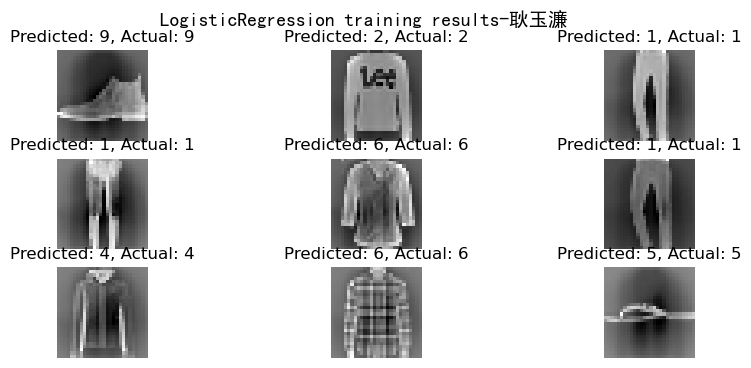

In [4]:
# 创建一个包含 3x3 子图的画布，设置画布大小为 10x4
fig, axes = plt.subplots(3, 3, figsize=(10, 4))

# 遍历每个子图和对应的测试样本
for i, ax in enumerate(axes.flatten()):
    # 在当前子图上显示第 i 个测试样本的图像，使用灰度色彩映射
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    
    # 设置子图标题为预测值和实际值
    ax.set_title(f'Predicted: {y_pred_logi[i]}, Actual: {y_test[i]}')
    
    ax.axis('off')

# 设置整个图像的标题
fig.suptitle('LogisticRegression training results-耿玉濂', fontsize=14, fontproperties="SimHei")

# 显示图像
plt.show()

## 绘制混淆矩阵

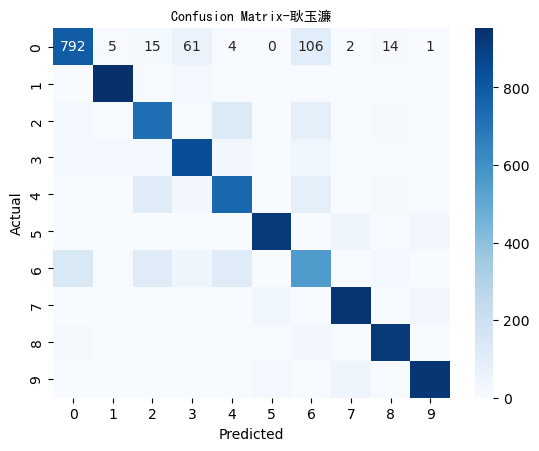

In [5]:
cm = confusion_matrix(y_test, y_pred_logi)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix-耿玉濂',fontproperties="SimHei")
plt.show()

## 训练SVM分类器

1. **初始化 SVM 分类器**

    初始化一个 SVM 分类器 `svm_clf`，使用默认的参数设置，其中 `gamma='scale'` 表示使用自动计算的 gamma 值。使用训练数据 `X_train` 和对应的标签 `y_train` 来训练 SVM 模型，通过 `fit()` 方法。

2. **进行预测**

    使用训练好的模型对测试数据 `X_test` 进行预测，得到预测结果 `y_pred_svm`。

3. **评估模型性能**

    打印模型的分类报告，包括精确度、召回率、F1 分数等性能指标，通过 `classification_report()` 函数。

4. **保存模型**

    使用 `joblib` 库的 `dump()` 函数将训练好的 SVM 模型保存到文件中，文件名为 `'model_svm.joblib'`，以便后续使用。
续以后使用。

In [6]:
# SVM
svm_clf = SVC(gamma='scale')  
svm_clf.fit(X_train, y_train)  
y_pred_svm = svm_clf.predict(X_test)  
print(classification_report(y_test, y_pred_svm))  
joblib.dump(svm_clf, 'model_svm.joblib')  

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.86      0.89      0.88      1000
           4       0.80      0.81      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.71      0.64      0.67      1000
           7       0.94      0.95      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



['model_svm.joblib']

## 可视化SVM模型效果

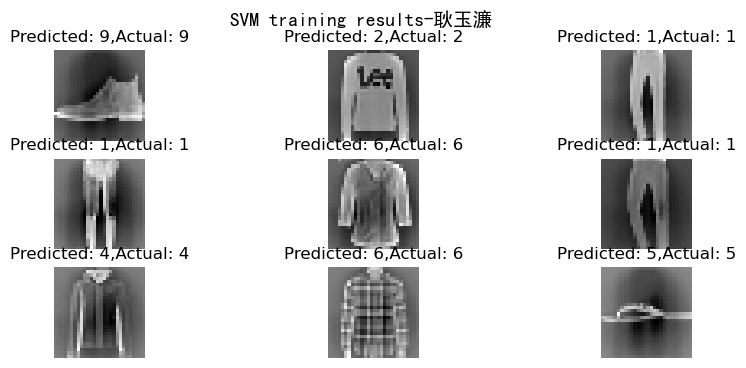

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(10, 4))  
for i, ax in enumerate(axes.flatten()):  
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')  
    ax.set_title(f'Predicted: {y_pred_svm[i]},Actual: {y_test[i]}')  
    ax.axis('off')  
fig.suptitle('SVM training results-耿玉濂',fontproperties="SimHei", fontsize=14)  

plt.show()


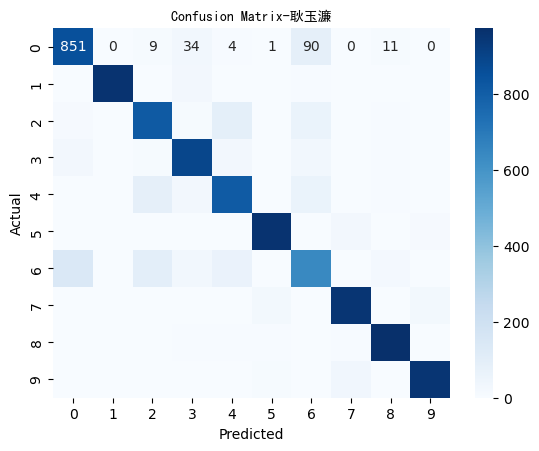

In [8]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix-耿玉濂',fontproperties="SimHei")
plt.show()

## CNN模型

In [9]:
#CNN
import tensorflow as tf  
from tensorflow.keras.datasets import fashion_mnist  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns


In [10]:

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 将训练和测试数据重塑为 CNN 模型所需的形状，并进行归一化处理
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# 对标签进行 one-hot 编码
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = Sequential([
    # 第一卷积块
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # 第二卷积块
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # 扁平化层和全连接层
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 输出层：10个类别
])


# 编译模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

# 保存模型到文件中，使用 Keras 原生格式保存模型
model.save('my_model.keras')

# 评估模型在测试数据上的性能
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# 使用模型对测试数据进行预测
y_pred_CNN = model.predict(X_test)

# 打印测试准确度
print("Test Accuracy: {}".format(test_accuracy))

NameError: name 'BatchNormalization' is not defined

In [ ]:
predictions = model.predict(X_test[:10])  
y_pred_temp = np.argmax(predictions, axis=1)  
y_test = np.argmax(y_test, axis=1)


In [ ]:
## 可视化CNN模型效果

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 4))  
for i, ax in enumerate(axes.flatten()):  
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')  
    ax.set_title(f'Predicted: {y_pred_temp[i]},Actual: {y_test[i]}')  
    ax.axis('off') 
fig.suptitle('CNN training results-耿玉濂', fontproperties="SimHei",fontsize=14)  
plt.show()

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()  
y_test = tf.keras.utils.to_categorical(y_test, 10)  
predicted_classes = np.argmax(predictions, axis=1)  
temp = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(temp,axis =1))  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix-耿玉濂',fontproperties="SimHei")
plt.show()


In [ ]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(temp,axis =1) ))

In [ ]:
import matplotlib.pyplot as plt  
  
# 定义模型的精度  
accuracies = [0.83, 0.88, 0.92]  
model_names = ['LogisticRegression', 'SVM', 'CNN']  
  
# 绘制柱状图  
index = range(len(model_names))  
bar_width = 0.35  
  
fig, ax = plt.subplots()  
bars = ax.bar(index, accuracies, bar_width, color=['blue', 'orange', 'green'])  
  
ax.set_xlabel('Model')  
ax.set_ylabel('Accuracy')  
ax.set_title('Accuracy Compare-耿玉濂',fontproperties="SimHei")  
ax.set_xticks(index)  
ax.set_xticklabels(model_names)  
  
def autolabel(bars):  
    for bar in bars:  
        height = bar.get_height()  
        ax.annotate('{}%'.format(height*100),  
                    xy=(bar.get_x() + bar.get_width() / 2, height),  
                    xytext=(0, 3),  # 3 points vertical offset  
                    textcoords="offset points",  
                    ha='center', va='bottom')  
  
autolabel(bars)  

plt.tight_layout()  
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 模型名称
model_names = ['Logistic Regression', 'SVM', 'CNN']

# 模型指标
accuracy = [0.83, 0.88, 0.92]
recall = [0.80, 0.85, 0.90]
f1_score = [0.81, 0.86, 0.91]

# 索引
index = np.arange(len(model_names))
bar_width = 0.25

def plot_combined_bar_chart():
    fig, ax = plt.subplots()
    bar1 = ax.bar(index, accuracy, bar_width, label='Accuracy', color='b')
    bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='r')
    bar3 = ax.bar(index + 2*bar_width, f1_score, bar_width, label='F1 Score', color='g')

    ax.set_xlabel('Model')
    ax.set_ylabel('Scores')
    ax.set_title('模型性能比较-耿玉濂', fontproperties="SimHei")
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(model_names)
    ax.legend()

    plt.tight_layout()
    plt.show()

plot_combined_bar_chart()


## 模型性能分析

### 逻辑回归（Logistic Regression）

结果分析：逻辑回归在Fashion MNIST上的表现较低，平均准确度为83%。这是因为它不擅长处理图像中的复杂模式和空间关系。尽管如此，作为基准模型，逻辑回归可以提供一个性能的下界，用于与其他更复杂的模型进行比较。

### 支持向量机（SVM）

结果分析：SVM在Fashion MNIST上的表现优于逻辑回归，达到了88%的准确率。SVM在处理高维数据时表现良好，但由于在图像处理中通常需要对图像进行展平，可能会丢失空间信息，从而限制了其性能。

### 卷积神经网络（CNN）

结果分析：CNN在Fashion MNIST上的表现最好，达到了91.6%的准确率。CNN的优势在于其能够捕获图像中的空间模式和局部特征，这是通过其网络结构中的卷积层实现的。通过调整网络结构和参数（如层数、卷积核大小、步长等），可以进一步优化CNN的性能。
